<a href="https://colab.research.google.com/github/albertomarin12/Simulac-n-matem-tica/blob/main/Correcci%C3%B3n_Examen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Examen B Módulo 1 - Optimización.

**Lea cuidadosamente las siguientes indicaciones antes de comenzar el examen:**
- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *Examen1_ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería *Examen1_MoralesGabriel*.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo (`Esc`,`B`) o (`Esc`,`A`).
- Recuerde que también se está evaluando su capacidad de interpretar los resultados. Escriba sus interpretaciones/conclusiones en celdas utilizando *Markdown*.
- El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera.
- No se resuelven dudas de ningún tipo por los profesores de la asignatura. Por favor, absténgase de preguntar.
- Revise bien el tipo de examen. Sólo se le calificará si realiza el tipo de examen asignado.

---
# Primer punto. Optimización de funciones con `SymPy` (34 puntos)

**Costo mínimo**. Imagine un contenedor rectangular sin tapa que debe satisfacer las siguientes condiciones:

- Este contenedor debe tener un volumen **V**.
- La longitud de su base es el doble que el de su ancho.
- El material para la base cuesta 12.00 MXN por cada $m^2$.
- El material para los lados cuesta 6.00 MXN por cada $m^2$.

¿Cuál es el costo del contenedor más barato?


1. Escriba el costo **C** del contenedor como una función del ancho de la base $x$ y de su altura $h$. Realice este punto usando $\LaTeX$ y celdas *Markdown*.

Función costo corregida

base: $2x^2 $

lados: $4xh + 2xh = 6xh $

$C(x, h)= 24x^2 +24xh$

2. Determina las dimensiones del contenedor si el volumen debe ser de $12m^3$.

Función volumen

$V= 2x^2h=12m^3$

In [9]:
import sympy as sp
import numpy as np

sp.var("x") #Base
sp.var("h") #Altura 

sp.var("b") #Area Base 
sp.var("l") #Area Base 

costo = 24*x**2 + 24*x*h

b = 2*x**2
l = x*h

v = b*h -12
v

2*h*x**2 - 12

In [10]:
costo

24*h*x + 24*x**2

In [11]:
s_x=sp.solve(v,x)
s_x[1]

sqrt(6)*sqrt(1/h)

In [12]:
v_x=s_x[1]
v_x

sqrt(6)*sqrt(1/h)

In [14]:
subs_x=costo.subs(x,v_x)
subs_x 

24*sqrt(6)*h*sqrt(1/h) + 144/h

In [15]:
df= sp.diff(subs_x,h)
df

12*sqrt(6)*sqrt(1/h) - 144/h**2

In [16]:
pc= sp.solve(df,h)
pc 

[2*3**(1/3)]

In [17]:
float(pc[0]) #valor de h

2.8844991406148166

In [19]:
num_x=float(v_x.subs(h,pc[0])) #valor de x 
num_x

1.4422495703074083

### Las dimensiones que la caja debe de medir para tener un volumen de 12cm cubicos es...
$$ altura = 2.88cm $$
$$ ancho = 1.44cm $$

3. ¿Cuál fue el costo de fabricar este contenedor?

In [20]:
costo_min= float(costo.subs(x,num_x).subs(h,pc[0]))
costo_min

149.76603525973707

### El costo mínimo para realizar la caja es de...
$$ costo = 149 UnidadesMonetarias $$

---
# Segundo punto. Programación lineal (33 puntos)

Una empresa se dedica a fabricar tarjetas de control para automóviles, y están en su momento de planeación de compras anuales. Hay 5 proveedores que pueden proveer los componentes, cada uno a su propio precio.

<table>
  <tr>
      <th>  </th>
      <th>Proveedor 1</th>
      <th>Proveedor 2</th>
      <th>Proveedor 3</th>
      <th>Demanda</th>
  </tr>
  <tr>
      <th>Componente 1</th>
      <td>0.5</td>
      <td>0.6</td>
      <td>0.7</td>
      <td>15000</td>
  </tr>
  <tr style="border-bottom: 1px solid #000;">
      <th>Componente 2</th>
      <td>0.7</td>
      <td>0.5</td>
      <td>0.6</td>
      <td>20000</td>
  </tr>
  <tr style="border-bottom: 1px solid #000;">
      <th>Componente 3</th>
      <td>0.32</td>
      <td>0.54</td>
      <td>0.8</td>
      <td>12000</td>
  </tr>

  <tr style="border-bottom: 1px solid #000;">
      <th>Capacidad</th>
      <td> 21000 </td>
      <td> 16000 </td>
      <td> 16000 </td>
      <td>  </td>
  </tr>
</table>

El proveedor tiene restricciones de capacidad de fabricación del tipo de componentes, por lo que un proveedor no puede satisfacer nuestra demanda completa para cada componente.

Se desea conocer la cantidad que se debe comprar de cada componente a cada proveedor para gastar la menor cantidad de dinero posible, pero al mismo tiempo lograr satisfacer la demanda para poder continuar con la manufactura del producto.

1. Escriba la función a **minimizar** junto con las restricciones, explicando detalladamente cada paso (usando fórmulas en $\LaTeX$, en celdas Markdown). Además escriba el problema en la forma \begin{equation}
\begin{array}{ll}
\min_{\boldsymbol{x}} & \boldsymbol{c}^T\boldsymbol{x} \\
\text{s. a. }        & \boldsymbol{A}_{eq}\boldsymbol{x}=\boldsymbol{b}_{eq} \\
                     & \boldsymbol{A}\boldsymbol{x}\leq\boldsymbol{b},
\end{array}\qquad\text{(23 puntos)}
\end{equation}

Función a minimizar
$$ 0.5X_1+ 0.6X_2 + 0.7X_3 + 0.7X_4 + 0.5X_5 + 0.6X_6 + 0.32X_7 + 0.54X_8 + 0.8X_9$$
Restricciones
$$ 21000 >= X_1+ 0X_2 + 0X_3 + X_4 + 0X_5 + 0X_6 + X_7 + 0X_8 + 0X_9$$
$$ 16000 >= 0X_1+ X_2 + 0X_3 + 0X_4 + X_5 + 0X_6 + 0X_7 + X_8 + 0X_9$$
$$ 16000 >= 0X_1+ 0X_2 + X_3 + 0X_4 + 0X_5 + X_6 + 0X_7 + 0X_8 + X_9$$
$$ -15000 >= -X_1 - X_2 - X_3 + 0X_4 + 0X_5 + 0X_6 + 0X_7 + 0X_8 + 0X_9$$
$$ -20000 >= 0X_1+ 0X_2 + 0X_3 - X_4 - 0X_5 - 0X_6 + 0X_7 + 0X_8 + 0X_9$$
$$ -12000 >= 0X_1+ 0X_2 + 0X_3 + 0X_4 + 0X_5 + 0X_6 - X_7 - X_8 - 
X_9$$

2. Resuelva el problema utilizando la función `linprog`. ¿Cómo debe ser la distribución de compras? ¿Cuánto dinero se necesita para satisfacer la demanda? (10 puntos)

In [ ]:
import scipy.optimize as opt
import numpy as np

c = np.asarray([0.5,
                0.6,
                0.7,
                0.7,
                0.5,
                0.6,
                0.32,
                0.54,
                0.8,])

A_ub = np.asarray([
    [1,  0,  0,  1,  0, 0, 1, 0, 0,], #Lunes
    [0,  1,  0,  0,  1, 0, 0, 1, 0,], #Martes
    [0,  0,  1,  0,  0, 1, 0, 0, 1,], #Miércoles
    [-1,-1, -1,  0,  0, 0, 0, 0, 0,], #Jueves
    [0,  0,  0, -1, -1,-1, 0, 0, 0,], #Viernes
    [ 0, 0,  0,  0,  0, 0,-1,-1,-1,], #Sábado
])

b_ub = np.asarray([21000,
                   16000,
                   16000,
                   -15000,
                   -20000,
                   -12000,
                   ])

opt.linprog(c, A_ub, b_ub, method="simplex")

     con: array([], dtype=float64)
     fun: 22940.0
 message: 'Optimization terminated successfully.'
     nit: 10
   slack: array([   0.,    0., 6000.,    0.,    0.,    0.])
  status: 0
 success: True
       x: array([ 9000.,     0.,  6000.,     0., 16000.,  4000., 12000.,     0.,
           0.])

Segun el modelo de optimización debemos pedir
1. 9000  unidades de componente 1 al proveerdor 1
2.   0  unidades de componente 2 al proveerdor 1
6000  unidades de componente 3 al proveerdor 1
   0  unidades de componente 1 al proveerdor 2
16000 unidades de componente 2 al proveerdor 2
4000  unidades de componente 3 al proveerdor 2
12000 unidades de componente 1 al proveerdor 3
   0  unidades de componente 2 al proveerdor 3
   0  unidades de componente 3 al proveerdor 3

# Tercer punto. Ajuste de curvas (33 puntos)

Utiliza el archivo adjunto en Canvas en el apartado que corresponde al examen.

Escribe tu número de expediente: 740526

Lee el archivo y extrae la siguiente información:
- $x$ es la primer columna del archivo
- $y$ es la columna correspondiente a los últimos dos dígitos de tu número de expediente + 1. E.g. mi expediente es $693871$; por lo tanto, debo usar la columna $72$.

In [ ]:
import pandas as pd
data = pd.read_excel("E01-RegresionLineal.xlsx")

1. Ajuste los datos con polinomios de grados 1, 3, y 5. Muestre los errores de forma gráfica. ¿Qué polinomio se ajusta mejor?

In [ ]:
x = data[0].values 
y = data[26].values

m = len(y)
ones = np.ones([m, 1])
x1 = np.reshape(x, [m, 1])
x3 = np.reshape(x**3, [m, 1])
x4 = np.reshape(x**4, [m, 1])
x5 = np.reshape(x**5, [m, 1])

X1 = np.hstack((ones, x1))
X3 = np.hstack((ones, x1, x2, x3))
X5 = np.hstack((ones, x1, x2, x3, x4, x5))

beta_inicial1 = np.random.rand(2)
beta_inicial3 = np.random.rand(4)
beta_inicial5 = np.random.rand(6)

y_vector = np.reshape(y, [m, 1])

def foo(beta, X, y) :
    m, n = X.shape
    beta = np.reshape(beta, [n, 1])
    prediccion = X @ beta
    error = prediccion - y
    return (error.T @ error)[0][0]

In [ ]:
sol1 = opt.minimize(foo, beta_inicial1, args=(X1, y_vector))
sol3 = opt.minimize(foo, beta_inicial3, args=(X3, y_vector))
sol5 = opt.minimize(foo, beta_inicial5, args=(X5, y_vector))


In [ ]:
sol1

      fun: 45821.84237431023
 hess_inv: array([[ 0.00199701, -0.00149701],
       [-0.00149701,  0.00149701]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([  7.53531496, -17.77337324])

2. Muestre en un gráfico los datos y el polinomio que mejor se ajuste.

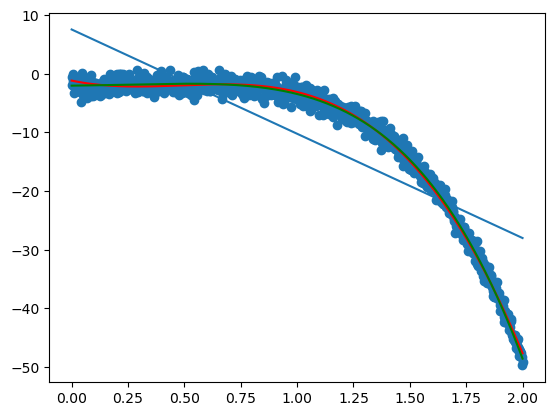

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.scatter(x, y)
plt.plot(x, X1 @ sol1.x)
plt.plot(x, X3 @ sol3.x, "r")
plt.plot(x, X5 @ sol5.x, "g")


<BarContainer object of 3 artists>

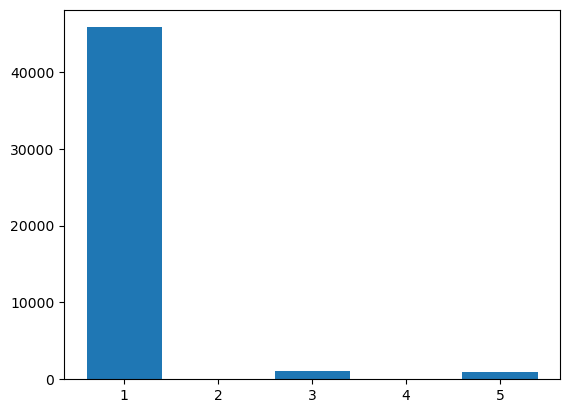

In [ ]:
plt.figure()
plt.bar([1, 3, 5], [sol1.fun, sol3.fun, sol5.fun])

<BarContainer object of 2 artists>

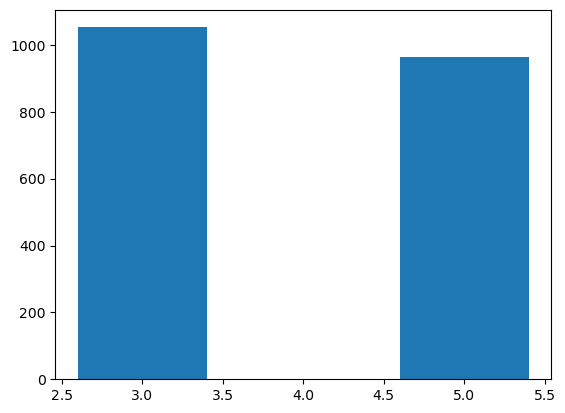

In [ ]:
plt.figure()
plt.bar([ 3, 5], [ sol3.fun, sol5.fun])

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.scatter(x, y)
plt.plot(x, X1 @ sol1.x)
plt.plot(x, X2 @ sol2.x, "r")
plt.plot(x, X3 @ sol3.x, "g")


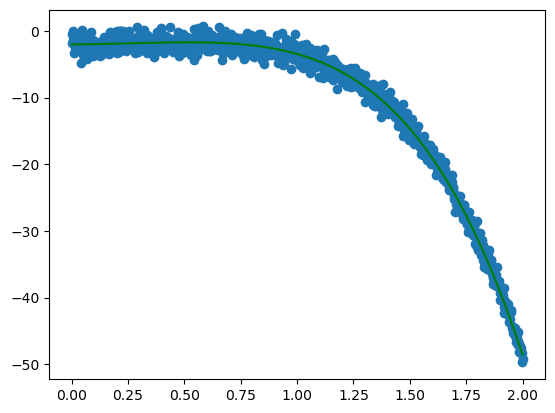

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.scatter(x, y)
plt.plot(x, X5 @ sol5.x, "g")


La ecuación con menos error es la función de grado 5

3. Use el modelo para averiguar el valor de $y$ cuando:
- $x=0.001$
- $x=-0.1$
- $x=2.1$

In [ ]:
sol5

      fun: 964.2161619724462
 hess_inv: array([[ 1.51898247e-02, -1.24165795e-01,  3.18527154e-01,
        -3.49465930e-01,  1.71684419e-01, -3.10671470e-02],
       [-1.24165795e-01,  1.42451829e+00, -4.21889358e+00,
         5.01361133e+00, -2.59148268e+00,  4.85700680e-01],
       [ 3.18527154e-01, -4.21889358e+00,  1.35125209e+01,
        -1.68731108e+01,  9.02500565e+00, -1.73441217e+00],
       [-3.49465930e-01,  5.01361133e+00, -1.68731108e+01,
         2.17973746e+01, -1.19517327e+01,  2.34078196e+00],
       [ 1.71684419e-01, -2.59148268e+00,  9.02500565e+00,
        -1.19517327e+01,  6.67808037e+00, -1.32748742e+00],
       [-3.10671470e-02,  4.85700680e-01, -1.73441217e+00,
         2.34078196e+00, -1.32748742e+00,  2.67057708e-01]])
      jac: array([-7.62939453e-06, -7.62939453e-06,  0.00000000e+00,  7.62939453e-06,
        0.00000000e+00,  7.62939453e-06])
  message: 'Optimization terminated successfully.'
     nfev: 168
      nit: 19
     njev: 24
   status: 0
  success:

In [ ]:
import sympy as sp

sp.var("x")

fx = -2.03818255 + 0.44871988*x + 1.09023466*x**2 + 0.16824843*x**3 -2.941412*x**4 -0.18958577*x**5 
fx

-0.18958577*x**5 - 2.941412*x**4 + 0.16824843*x**3 + 1.09023466*x**2 + 0.44871988*x - 2.03818255

In [ ]:
V1 = fx.subs(x,0.001)
V1

-2.03773273972003

In [ ]:
V2 = fx.subs(x,-.1)
V2

-2.07261268517230

In [ ]:
V3 = fx.subs(x,2.1)
V3

-59.6775362867977

4. ¿Qué diferencias encuentra en cuanto a la interpolación y la extrapolación?

La diferencia es que la extrapolación nos permite ver fuera del rango de datos que tenemos, mientras que la interpolación es estimar dentro del rango de datos que tenemos.

5. (Punto extra) Agregue un termino $\beta_5 cos(10x)$ a su modelo y grafique los resultados. ¿Mejoró el resultado?